In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)   
pd.set_option('display.max_colwidth', -1)  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#read data
data_path = ('/Users/markespina/Downloads/sentiment_labelled_sentences/yelp_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
#rename columns
data_raw.columns=['review', 'sentiment']

In [3]:
keywords=['great', 'good', 'love', 'amazing', 'fantastic']
for key in keywords:
# chosen key words more likely to be end of senctence for positive reviews, adjust for pattern
    data_raw[str(key)] = data_raw.review.str.contains(
        ' ' + str(key),
        case=False
    )
#check if word 'not' is present in review
data_raw["absence of 'not'"]=data_raw.review.str.contains('not' + ' ', case=False)==False
    

***removed char count  and boolean '<100 char' from features***

In [5]:
# count number of conditions met
for x in range(len(data_raw)):
    bool_cnt=0
    for elem in list(data_raw.T[x]):
        if elem==True:
            bool_cnt+=1
    data_raw.loc[x, 'condition_count']=bool_cnt


In [6]:
'''reduced requirements for conditions met --review meeting at least 2 conditional features, most likely to be positive, 
   i.e has 2 keywords, has 1 keyword and doesn't contain 'not' etc...'''
data_raw['condition_count>1']=data_raw['condition_count']>1

In [12]:
data_raw.head()

,review,sentiment,great,good,love,amazing,fantastic,absence of 'not',condition_count,condition_count>1
0,Wow... Loved this place.,True,False,False,True,False,False,True,3.0,True
1,Crust is not good.,False,False,True,False,False,False,False,1.0,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,0.0,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,True,False,False,True,False,False,True,3.0,True
4,The selection on the menu was great and so were the prices.,True,True,False,False,False,False,True,3.0,True


In [13]:
#convert outcome variable to bool to check crreleation
data_raw['sentiment'] = (data_raw['sentiment'] == 1)

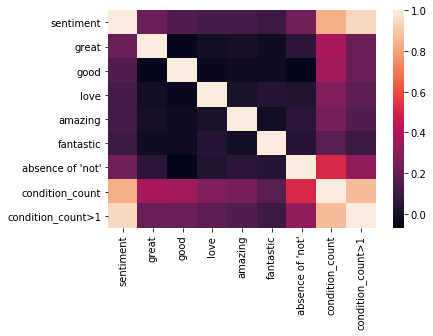

In [14]:
sns.heatmap(data_raw.corr()) # features uncorrelated

In [16]:
data_raw.head()

,review,sentiment,great,good,love,amazing,fantastic,absence of 'not',condition_count,condition_count>1
0,Wow... Loved this place.,True,False,False,True,False,False,True,3.0,True
1,Crust is not good.,False,False,True,False,False,False,False,1.0,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,0.0,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,True,False,False,True,False,False,True,3.0,True
4,The selection on the menu was great and so were the prices.,True,True,False,False,False,False,True,3.0,True


In [17]:
data = data_raw[keywords+["absence of 'not'"]+['condition_count>1']]
target = data_raw['sentiment']

In [18]:
data.head()

,great,good,love,amazing,fantastic,absence of 'not',condition_count>1
0,False,False,True,False,False,True,True
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,True,True
4,True,False,False,False,False,True,True


In [19]:

bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 29


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_test)

# Display our results.
bnb.score(X_test, y_test)

0.975

In [22]:
print("Number of mislabeled points out of a total {} points : {}".format(
    X_test.shape[0],
    (y_test != y_pred).sum()
))

Number of mislabeled points out of a total 200 points : 5


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, X_train, y_train, cv=10)

array([0.96296296, 0.96296296, 0.975     , 0.95      , 0.975     ,
       0.975     , 1.        , 1.        , 0.93670886, 0.96202532])

In [75]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.96
Testing on Sample: 0.9625668449197861


In [90]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [91]:
y_pred=bnb.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[69,  3],
       [ 3, 75]])

In [58]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.979381443298969
0.9693877551020408
0.9743589743589743


In [40]:
1-(15/(90+15))

0.8571428571428572

In [41]:
(2*precision_score(y_test,y_pred)*recall_score(y_test,y_pred))/(precision_score(y_test,y_pred)+recall_score(y_test,y_pred))

0.923076923076923

In [136]:
y = data_raw.sentiment

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [138]:
lr.fit(X_train,y_train)
lr.score(data,target)

0.971

In [128]:
cross_val_score(lr, X_train, y_train, cv=10) 

array([0.96296296, 0.96296296, 0.975     , 0.95      , 0.975     ,
       0.975     , 1.        , 1.        , 0.93670886, 0.96202532])